## Satellite Imagery for Solar Energy Monitoring
#### Wonder Week 2025

In [1]:
# Import packages

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

#### 1. Exploring the Level 2 dataset

In [2]:
path = './NCEO-L2-CLOUD-AEROSOL-SEVIRI_ORAC_MSG3_202506301200_R9999.sisem.nc'
ds = xr.open_dataset(path)
ds

/root/Obs4MIPs_demo/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)


<xarray.Dataset> Size: 6MB
Dimensions:       (along_track: 400, across_track: 400)
Dimensions without coordinates: along_track, across_track
Data variables:
    time          (along_track, across_track) datetime64[ns] 1MB ...
    lat           (along_track, across_track) float32 640kB ...
    lon           (along_track, across_track) float32 640kB ...
    boa_swdn_tot  (along_track, across_track) float32 640kB ...
    boa_par_tot   (along_track, across_track) float32 640kB ...
    boa_par_dif   (along_track, across_track) float32 640kB ...
    boa_swdn_dif  (along_track, across_track) float32 640kB ...
    stemp         (along_track, across_track) float32 640kB ...
Attributes: (12/35)
    Conventions:           CF-1.4
    title:                 SISEM L2 Bugsrad File
    institution:           RAL_Space
    source:                null
    history:               n/a
    references:            doi:10.5194/amt-5-1889-2012
    ...                    ...
    Emissivity_File:       /gws/nopw/j04/nceo_generic/cloud_ecv/data_in/emiss...
    USGS_File:             /gws/nopw/j04/aerosol_cci/proud/GEO_FILES/MSG_000E...
    Snow_File:             /gws/pw/j07/rsgnceo/scratch/sisem_nrt/ecmwf/c1/202...
    Sea_Ice_File:          /gws/pw/j07/rsgnceo/scratch/sisem_nrt/ecmwf/c1/202...
    Level1b_File:          /work/scratch-nopw2/dhegedus/sisem_nrt/hrit/2025/0...
    Geo_File:              /work/scratch-nopw2/dhegedus/sisem_nrt/hrit/2025/0...

Questions:

- What are the dimensions of this dataset?
- What geographical area is covered by this dataset? (Region, minimum/maximum latitude and longitude coordinates)
- What time period does it cover?
- What data variables does this file contain? What do these variables measure/represent?
- What kind of ancillary files were used as input to produce this file?

<details>
<summary>Hints</summary>

- Try ds.stemp.shape or ds.dims

- Try using ds.lat.min(), ds.lat.max()

- Have a look at the filename, or for more details ds.time

- Try using ds.data_vars or ds.variables

- Have a look at the global attributes
</details>

<details>
<summary>Solutions</summary>

- 400x400 pixels

- UK, [41.89, 67.54, -19.50, 11.95]

- 30th June 2025 noon (technically the scanning took place from 12:11:00 until 12:12:21)

- Bottom of Atmosphere total downwelling solar radiation (how much sunlight reaches the surface), Bottom of Atmosphere downwelling diffuse solar radiation (how much indirect sunlight reaches the surface, e.g. from being reflected back from the bottom of clouds), Bottom of Atmosphere total photosynthetically active radiation (how much of the radiation reaching the surface is in the right wavelengths to be useful for photosynthesis), Bottom of Atmosphere diffuse photosynthetically active radiation (how much of the indirect radiation reaching the surface is in the right wavelengths to be useful for photosynthesis), surface temperature (the temperature of the thin top layer of the surface)

- Albedo_File, BRDF_File, Emissivity_File, USGS_File, Snow_File, Sea_Ice_File, Level1b_File, Geo_File
</details>

#### 2. Identifying cloud cover in the data

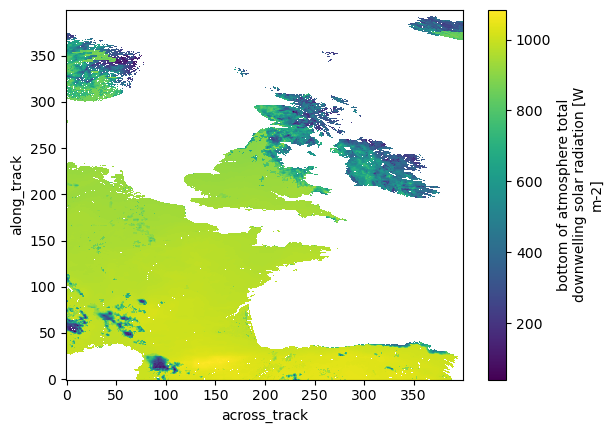

In [19]:
# Plot the bottom of atmosphere downwelling solar radiation
ds.boa_swdn_tot.plot()

In [10]:
# Plot the surface temperature

### ADD CODE HERE

<details>
<summary>Solutions</summary>

ds.stemp.plot()

</details>

In [20]:
# Now let's look at the map of the cloud cover and cloud thickness
# using variable cldmask and cot in file named
# NCEO-L2-CLOUD-AEROSOL-SEVIRI_ORAC_MSG3_202506301200_R9999.primary.nc

### ADD CODE HERE

<details>
<summary>Solutions</summary>

pathprim = './NCEO-L2-CLOUD-AEROSOL-SEVIRI_ORAC_MSG3_202506301200_R9999.primary.nc'

dsprim = xr.open_dataset(pathprim)

dsprim.cldmask.plot()

dsprim.cot.plot()

</details>

Questions:

- Do areas with cloud cover have higher or lower solar radiation reaching the surface? How does cloud cover affect the surface temperature?

- How does cloud thickness affect the amount of radiation reaching the surface? How does it affect the surface temperature?

- Solar panel owners of which part of the UK likely had the highest solar energy production on this day based on the satellite data? How did you get to your conclusion?

<details>
<summary>Solutions</summary>

Under clear-sky conditions, more sunlight (solar radiation) reaches the surface than during cloudy conditions. This is because the clouds are bright (white) and so they reflect most of the incoming solar radiation back towards space, shielding the surface. Depending on the thickness (optical thickness or optical depth) of the cloud, it might let most of the sunlight through (e.g. thin, high clouds), or it could reflect most of the sunlight back (e.g. thick storm clouds).

Cloudy regions in the summer tend have cooler surface temperature (in the winter it is actually the opposite because clouds reflect back the thermal radiation/heat emitted by the Earth). The thicker the clouds, the cooler the surface can get in the summer (e.g. during a stormy/rainy days). Another example is how the surface can get really hot during a heatwave - when clouds tend to be rare due to the high surface pressure.

On the 30th June 2025, South England was experiencing a heatwave, and skies were mostly clear. This means that more solar radiation reached the surface in the South of England than e.g. Scotland, so houseowners with solar panels in South England were probably quite happy with the amount of energy their panels produced.

</details>

#### 3. Filtering for cloud cover

/root/Obs4MIPs_demo/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/root/Obs4MIPs_demo/miniforge3/envs/WonderWeek2025/lib/python3.13/site-packages/xarray/coding/times.py:365: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)


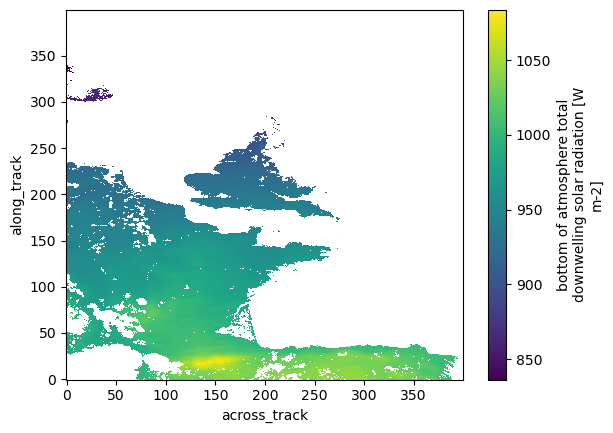

In [ ]:
# Use cldmask from the primary file to filter out 
# cloudy pixels from the BOA_swdn radiation

### ADD CODE HERE

<details>
<summary>Solutions</summary>

path = './NCEO-L2-CLOUD-AEROSOL-SEVIRI_ORAC_MSG3_202506301200_R9999.sisem.nc'

ds = xr.open_dataset(path)

pathprim = './NCEO-L2-CLOUD-AEROSOL-SEVIRI_ORAC_MSG3_202506301200_R9999.primary.nc'

dsprim = xr.open_dataset(pathprim)

ds.boa_swdn_tot.where(dsprim.cldmask == 0).plot()

</details>